In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [2]:
%%HTML
<h3> Import Data </h3>

In [3]:
#First import data 

df = pd.read_csv('S21_P1_trainset.csv')

In [4]:
df.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
#How to explore the data 
#1 find missing values 
#2 correct for any missing values
# plot the distribution of the data and see how if its skewd
# if skewd we may need to normalize the data or standatdize it

In [6]:
#Find the shape of the data
df.shape

(200000, 201)

In [7]:
#explore data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [8]:
df.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,6.618800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,7.629600,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,8.584425,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,11.150600,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [15]:
%%HTML
<h3> Handle Missing Values </h3>

In [16]:
#Check for missing values
df.isna().sum()

#No NA values present in dataset

ID_code    0
var_0      0
var_1      0
var_2      0
var_3      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64

In [17]:
#Check for duplicate rows 
dup_rows = df[df.duplicated()]
dup_rows.shape

#There are no duplicate rows in the data

(0, 201)

In [12]:
%%HTML
<h3> Explore Data </h3>

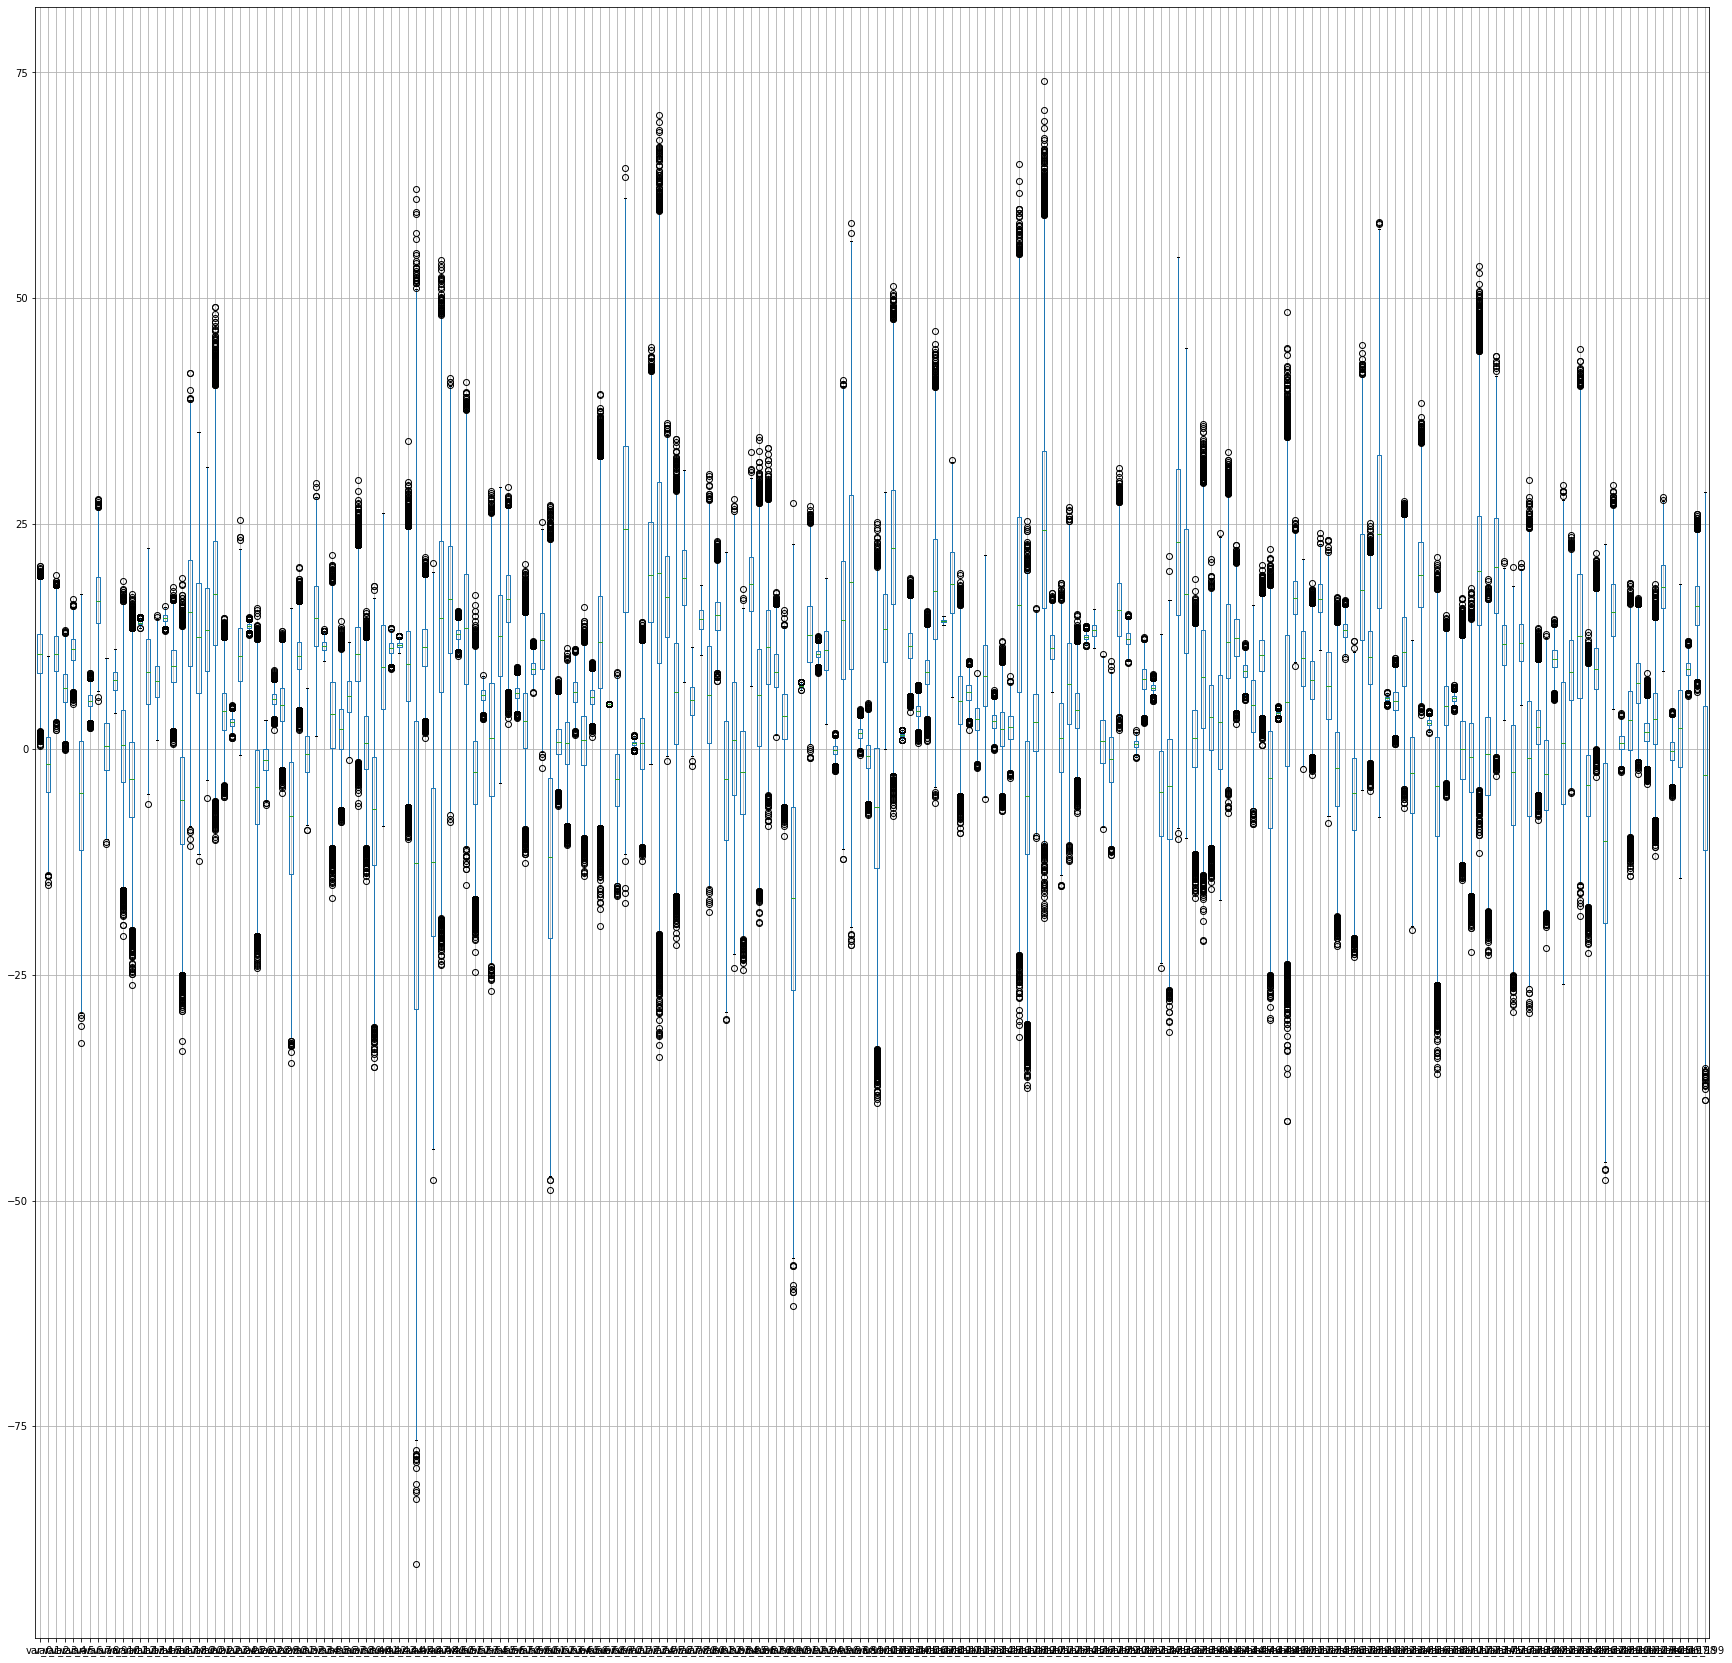

In [13]:
#check data with box plot
df.boxplot(figsize=(30,30))

#Initial box plot shows large variation in how the data is distributed 
#

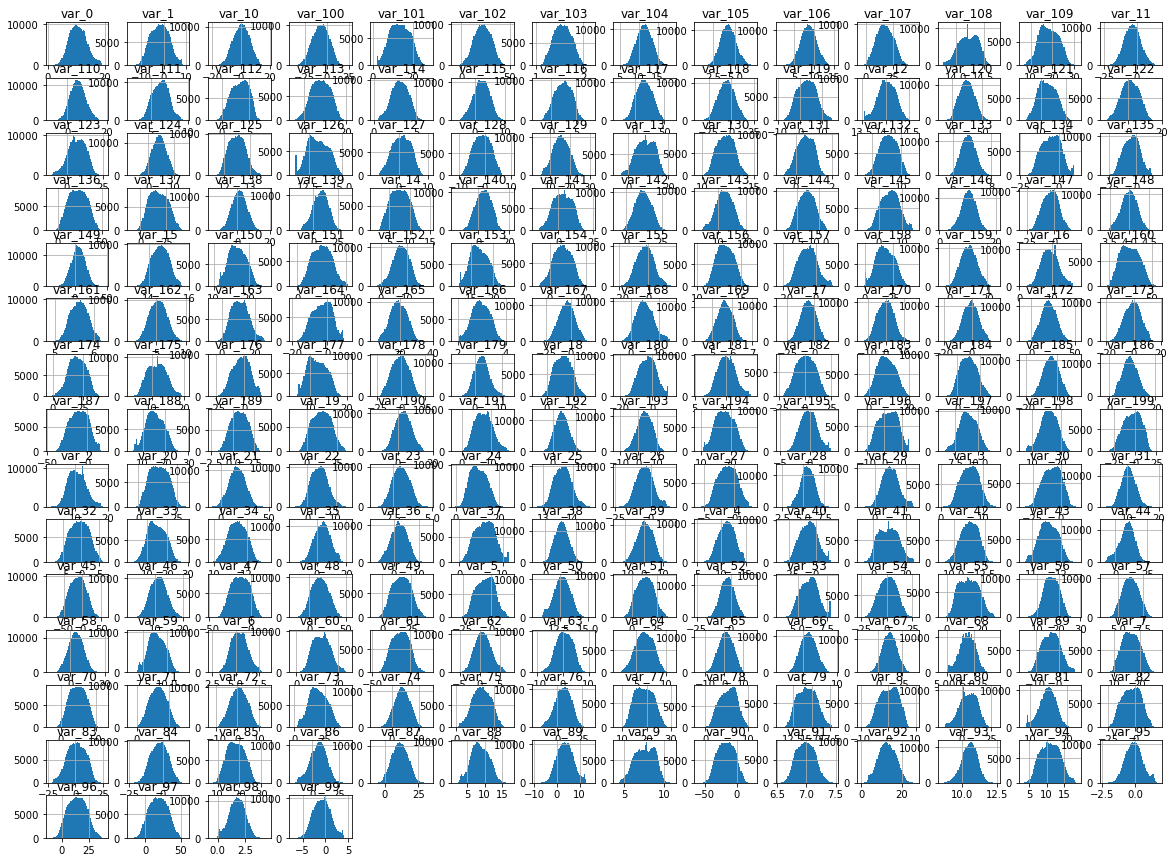

In [15]:
#Find distribution for all features
df.hist(bins=50, figsize=(20,15))
plt.show()

#The features all have gausian distribution but are centered around different X values 

In [18]:
#Drop ID_code Column as it is a redundant
df = df.drop(['ID_code'],1)

In [19]:
columns = df.columns

In [20]:
%%html
<h3> Standardize <h3>

In [21]:
#use StandardScaler to standadize data then plot again
scaler = StandardScaler()
df_std = scaler.fit_transform(df)


In [22]:
df_std = pd.DataFrame(df_std)

In [23]:
df_std.columns = columns

In [24]:
df_std.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,-0.577102,-1.273737,0.451707,-0.833709,0.235571,-0.536430,-0.334926,0.608751,-1.561580,-1.473796,...,0.263374,-1.149158,0.817469,-0.411013,0.168705,-1.578117,1.022131,-0.373968,-1.026398,0.214135
1,0.269959,-0.622138,1.190360,-0.688846,0.790975,1.539900,0.244461,-0.003525,0.858974,0.419300,...,0.966611,0.093605,0.443623,1.908764,-0.817594,1.522342,1.067654,-0.129400,0.825417,0.505685
2,-0.681113,-0.276066,0.516988,0.536516,-0.305477,-0.511033,1.769839,-0.564749,-1.561370,-1.307408,...,-0.072093,0.777997,-0.174131,-0.412316,1.151591,2.297370,-1.617906,-0.695141,-0.381449,0.356681
3,0.125158,-0.129426,-0.667575,0.195355,0.927992,0.410672,0.500633,-0.474201,-1.843910,0.548767,...,0.270216,-0.891456,-0.818468,-0.478548,1.607869,-0.789517,-0.959020,1.501744,0.697118,-0.543502
4,-0.277303,0.035610,0.817683,-0.077829,0.738607,0.955574,0.613372,0.791544,1.794753,0.090006,...,-1.036191,0.688988,-1.405987,1.468536,-1.501101,-0.958473,0.297627,0.645537,0.706318,-0.525375


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016F5D800F40>,
      dtype=object)

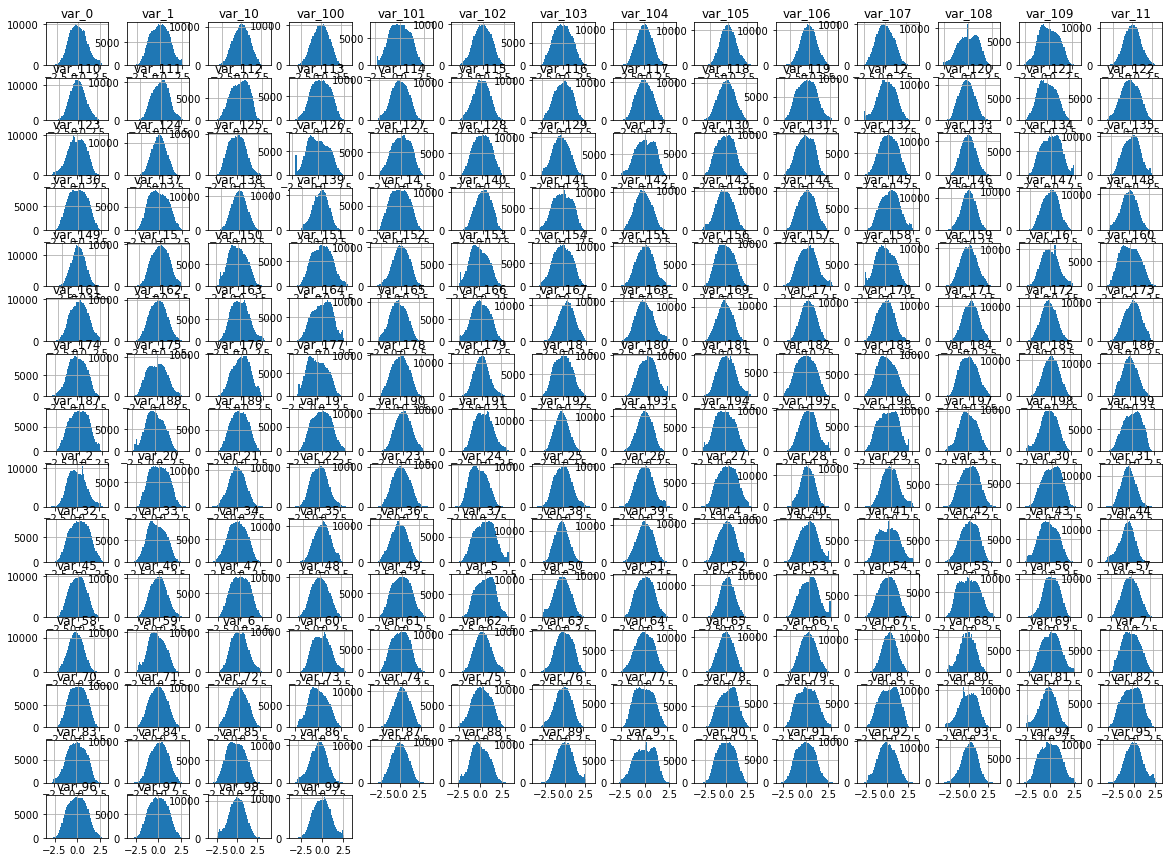

In [28]:
#Plot again
df_std.hist(bins=50, figsize=(20,15))

In [25]:
df_nonstd = df
df = df_std

In [18]:
#Find the skewness of the data
df.skew()

var_0      0.235639
var_1      0.053115
var_2      0.260313
var_3     -0.003548
var_4     -0.048210
             ...   
var_195    0.124048
var_196   -0.032527
var_197   -0.031094
var_198   -0.170156
var_199   -0.164349
Length: 200, dtype: float64

In [22]:
%%HTML
<h3> Remove Outliers </h3>

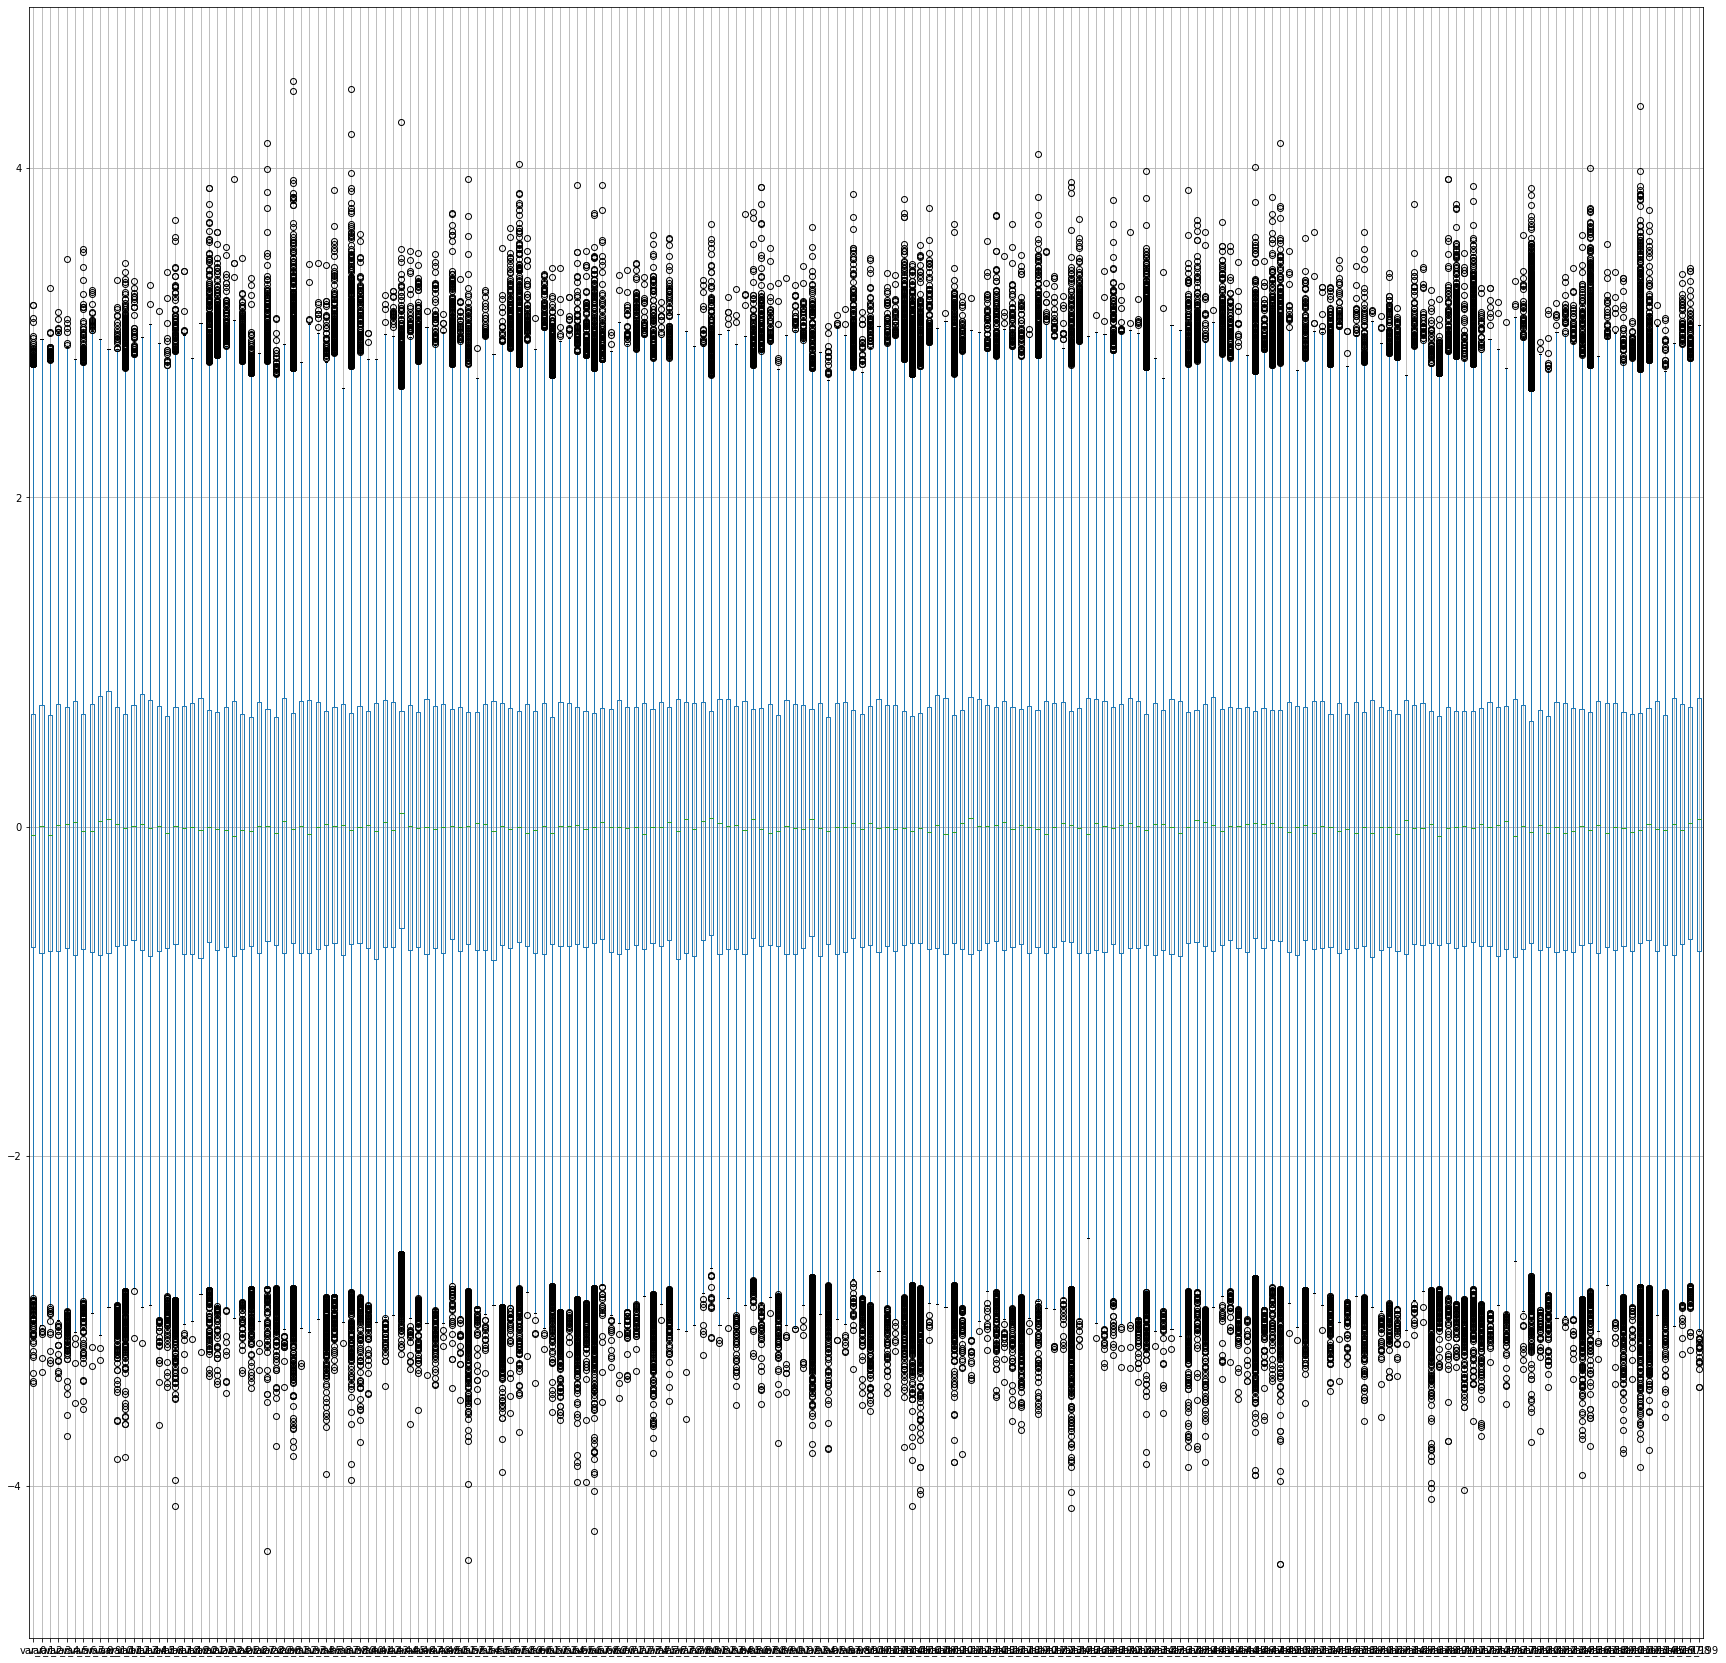

In [23]:
#Make box plots to plot range of data and identify possible outliers
df.boxplot(figsize=(30,30))
plt.show()

#The outliers for each of the features are the black circles that above and below the max and min, respectively

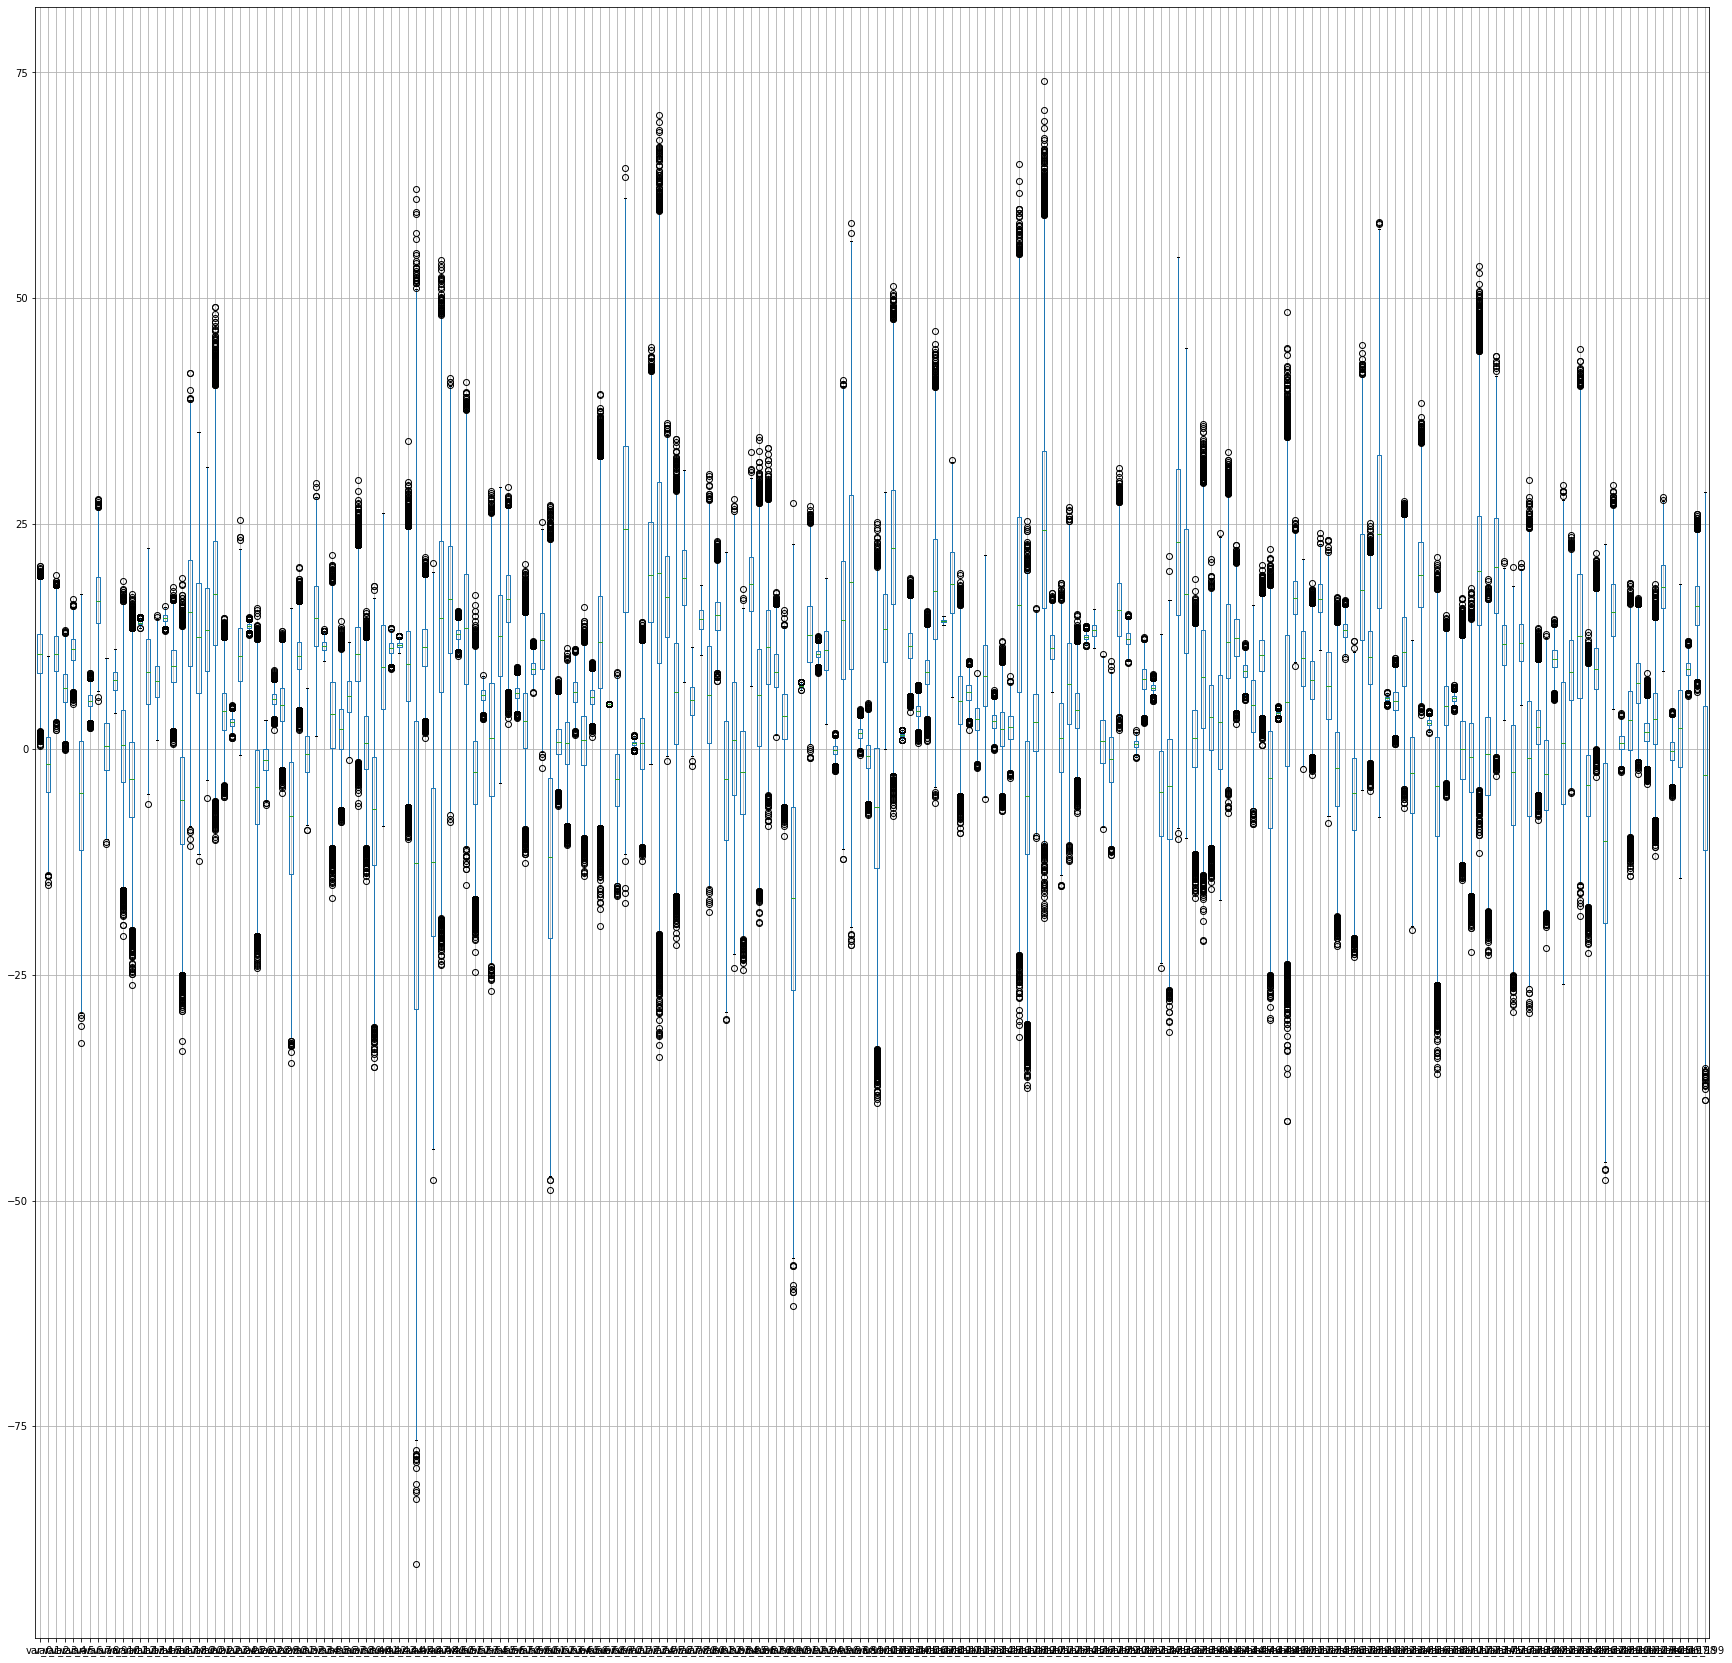

In [40]:
df_nonstd.boxplot(figsize=(30,30))

In [26]:
#We detect and remove outliers based on the IQR or Interquartile range which is defined as the quantile3 -quantile 1
#define the upper and lower bound
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
lower_bound = q1-(1.5 *iqr)
upper_bound = q3+(1.5 *iqr)



In [27]:
#create new data frame that excludes data points above upper bound and below lower bound
#The tilde reverses true and false 
df_NO = df[~((df < lower_bound) |(df > upper_bound)).any(axis=1)]
df_NO.shape

#Notice reduced size of df_NoOutliers 

(175104, 200)

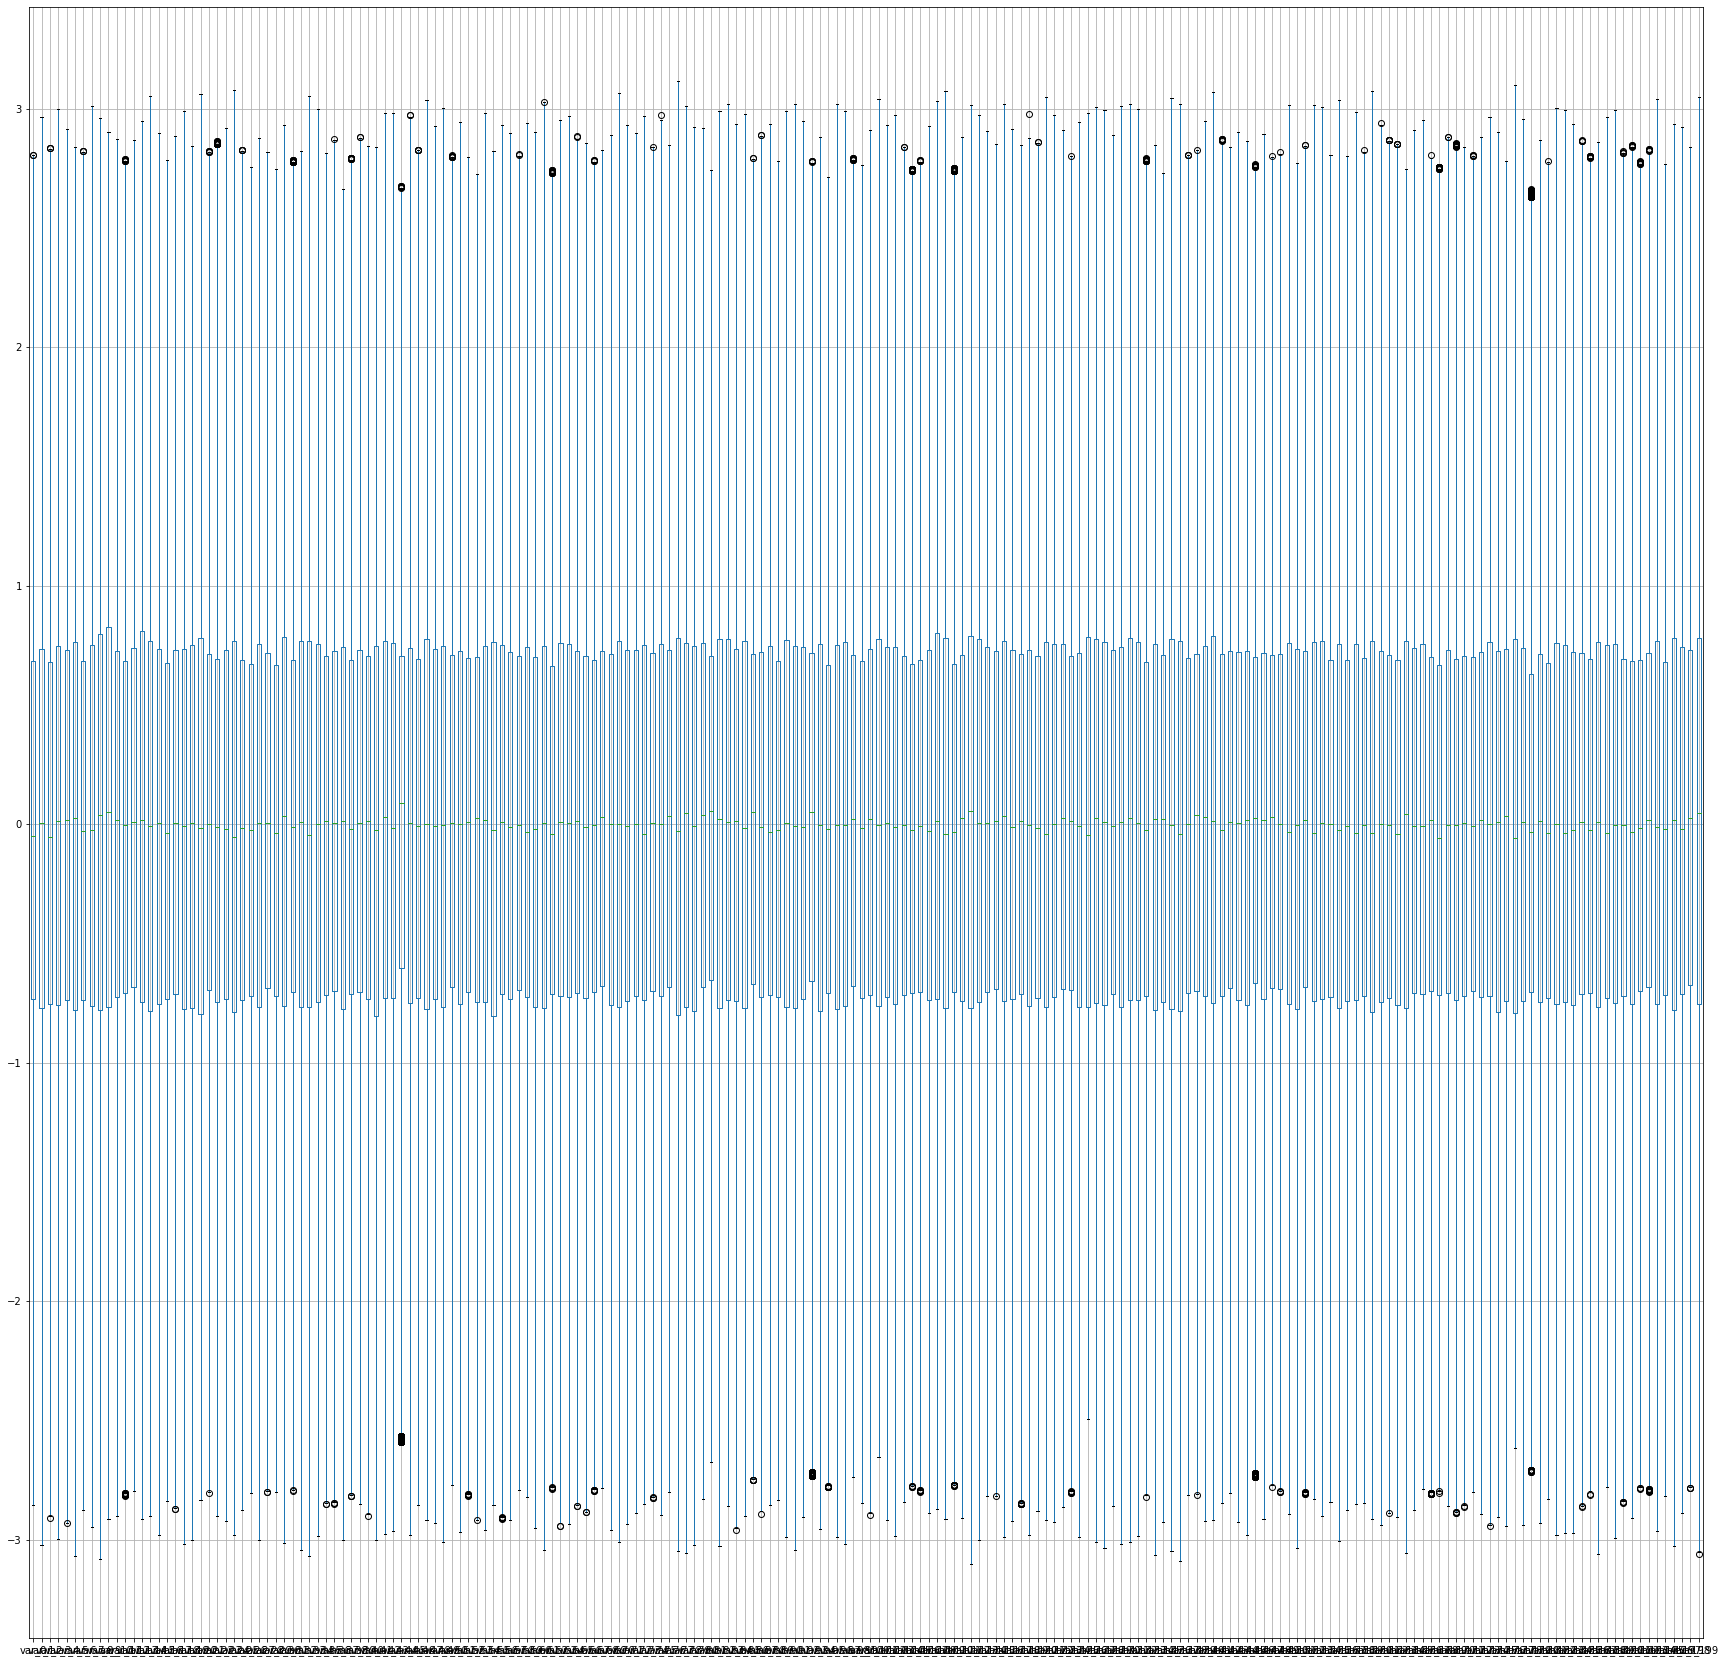

In [40]:
#Make box plot again

df_NO.boxplot(figsize=(30,30))
plt.show()

#Much fewer outliers!

In [50]:
#find Pearson correlation of features
corr_matrix = df_NO.corr()
corr_matrix.sort_values(by='var_0', ascending=False)

#All values are very low indicating a no significant positive or negative correltion between the columns

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,0.000447,0.005772,0.003607,0.001497,0.003588,0.006565,0.002388,0.003740,-0.001769,...,0.002344,0.000057,-0.005919,0.002756,-0.001463,0.002069,0.002914,0.000658,-0.004247,0.002421
var_40,0.007480,0.000810,0.002258,0.003373,0.000625,0.003528,0.001087,0.000302,-0.004330,-0.001388,...,0.003887,0.001697,-0.002517,0.001132,0.001092,0.003384,-0.001278,0.001707,-0.003906,0.001131
var_6,0.006565,0.002896,0.000188,-0.000779,0.000379,0.003735,1.000000,-0.002590,-0.002256,-0.005398,...,0.001677,0.005693,-0.002562,0.001597,-0.000528,0.000565,0.006531,-0.004202,-0.001469,0.004995
var_74,0.006530,0.001837,0.002078,-0.003098,0.000042,0.002446,-0.001739,0.000131,0.001876,0.000414,...,0.001240,-0.001896,0.000812,0.000117,-0.001972,-0.004744,0.000921,-0.001077,0.001479,-0.004549
var_26,0.006436,0.004549,0.004212,0.002438,0.000694,0.003740,0.003819,-0.001518,0.002287,-0.005265,...,0.002543,-0.000820,-0.000459,-0.000462,-0.004690,-0.000022,0.000475,-0.004236,-0.005991,0.004613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_81,-0.006730,-0.003077,-0.004548,-0.003599,0.000329,-0.000013,-0.003539,0.000212,-0.003817,0.001197,...,-0.001080,-0.002009,0.003187,0.001554,0.004186,-0.004463,-0.001580,0.002768,0.004573,0.000404
var_139,-0.006970,0.001068,-0.002746,0.001041,0.003286,0.000409,-0.003191,0.001636,0.001573,0.000450,...,-0.001645,-0.003893,0.000856,0.001045,0.004391,-0.002031,-0.005788,0.000737,0.004451,-0.000848
var_76,-0.007024,-0.001733,-0.006985,-0.000106,0.003575,-0.002012,-0.003840,0.001691,-0.001009,0.000881,...,-0.004973,-0.001632,0.003319,-0.003227,-0.003906,0.000835,-0.001076,0.004731,0.000817,-0.002867
var_166,-0.007054,-0.007512,-0.005882,0.001766,-0.003684,-0.000200,-0.003846,-0.000671,-0.001072,0.005554,...,-0.002621,-0.007413,0.004826,-0.000649,-0.000823,-0.000520,0.000025,0.002921,-0.001393,-0.006069


In [56]:
#We can try Kendal Tau correlation matric using df.corr('kendall')


kendal_matrix = df_NO.corr('kendall')

In [59]:
kendal_matrix.sort_values(by='var_0', ascending =False)

#the Kendall Tau correlation also indecates no significant positive or negative correlation

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,-0.000248,0.003111,0.002076,0.000841,0.001677,0.002980,0.001623,0.002728,-0.001121,...,0.001489,-0.000769,-0.004522,0.002527,-0.000355,0.001210,0.001929,0.001153,-0.002889,0.001221
var_40,0.004328,0.000728,0.001474,0.002314,0.000079,0.002201,0.000651,0.000093,-0.002902,-0.001035,...,0.002146,0.000998,-0.001535,0.000535,0.000682,0.002125,-0.001396,0.001550,-0.001911,0.000617
var_74,0.004121,0.001315,0.001737,-0.002491,0.000296,0.001268,-0.001498,-0.000043,0.001100,0.000229,...,0.001112,-0.002066,0.000511,-0.000438,-0.001465,-0.003972,0.000967,-0.000557,0.000536,-0.002755
var_68,0.003990,-0.000712,0.000502,0.001756,-0.000072,-0.000670,0.001192,0.001717,0.001369,0.001395,...,0.000420,-0.000468,0.000295,0.000233,-0.000671,-0.000189,0.000609,0.000631,-0.003239,0.000814
var_110,0.003905,0.001064,0.003124,-0.001258,0.001515,0.000417,0.000162,-0.000134,-0.000565,0.000501,...,0.000357,0.003364,-0.000625,0.000675,-0.001310,-0.000253,-0.000484,-0.002227,0.001784,0.000728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_149,-0.004152,-0.001654,-0.002183,-0.000362,-0.001620,-0.000147,-0.002896,-0.002063,-0.000581,0.003393,...,-0.000965,-0.000469,0.000359,0.000517,0.000887,-0.004800,-0.000040,-0.000709,0.003144,-0.002097
var_90,-0.004273,-0.001958,0.001918,0.000280,0.002271,0.001045,0.002679,0.002104,0.000310,-0.001565,...,0.001335,-0.000730,0.000634,-0.002182,0.000304,-0.002155,0.003662,0.000140,0.001323,0.000369
var_192,-0.004522,-0.001298,-0.001629,-0.001207,0.002024,0.000496,-0.001076,0.001889,-0.001061,-0.000235,...,0.001093,-0.001128,1.000000,0.000212,0.000937,-0.001649,-0.002039,-0.000318,0.002540,0.000690
var_139,-0.005152,0.000518,-0.001302,0.001594,0.002878,-0.000252,-0.001475,0.000388,0.001428,0.000298,...,-0.001015,-0.002382,0.000390,0.000682,0.002629,-0.000471,-0.003822,0.001029,0.001937,-0.000311


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CC1A0A98B0>,
      dtype=object)

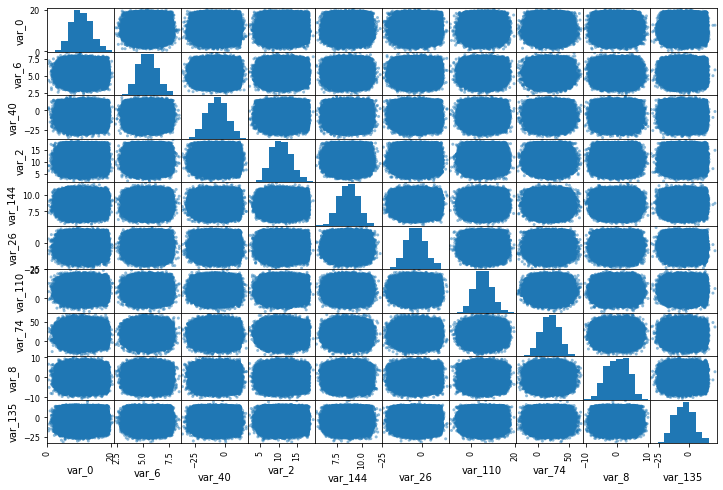

In [24]:
#Investigate features with positive correlation by conducting scatter_matrix
features =['var_0', 'var_6', 'var_40', 'var_2', 'var_144', 'var_26', 'var_110',
       'var_74', 'var_8', 'var_135',]

scatter_matrix(df[features], figsize=(12,8))

#No meaningful data 

In [35]:
#Can we do feature engineering on unlabeled data?
#We may be able to do more feature engineering after clustering


In [30]:
%%HTML
<h3> Perform PCA <h3>

In [72]:
#Perform PCA using 90% of explained variance
#peform on df_NO no outliers
pca = PCA()
pca.set_params(n_components=0.90)
principal_components = pca.fit_transform(df_NO)

In [98]:
principal_components.shape

(175104, 179)

In [99]:
pca.components_.shape

(179, 200)

In [103]:
#the eigenvectors are pca.components_ and the eigenvalues are the pca.explained_variance_
#find eigen values and keep eigen values > 1
eigenvalues = pca.explained_variance_
eigenvalues.shape

#each eigenvalue corresonds to a feature column

(179,)

In [153]:
pcaDF = pd.DataFrame(data=principal_components)

In [154]:
pcaDF.head()

,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,178
0,-0.359648,-0.672629,-0.007624,-0.989022,0.534263,0.423243,0.220772,0.505883,0.772846,0.447646,...,-0.207477,-0.018127,0.027242,-1.696893,-0.990747,-0.292723,-0.962374,-0.127960,1.024814,0.937681
1,-0.090960,-0.046155,0.001512,-2.113316,0.966374,1.179626,0.579648,0.872444,-0.997130,-0.585323,...,0.031516,0.356713,-0.915558,0.154771,0.405637,-0.966669,-0.094570,-0.453379,-0.161491,0.636073
2,1.251212,-0.501867,-0.570993,0.066292,0.625774,1.076265,0.598459,-0.421861,0.718082,0.238637,...,0.024312,0.761107,2.284652,0.554399,0.535939,0.915245,-0.000155,1.525679,-0.222228,-2.460155
3,0.610425,-0.550282,-0.133636,0.818883,-1.235293,-1.252138,0.443177,0.089664,1.727043,0.615492,...,-0.644663,0.540128,0.457290,-2.481591,-0.745876,1.298192,-1.279068,-0.212601,0.667123,-1.526335
4,0.509575,-1.460405,0.055359,1.497622,-0.011515,-0.537367,1.281558,-0.882478,-1.337696,-0.945892,...,-0.716458,-0.820753,-0.871080,1.531823,-0.210472,1.001979,0.049549,-1.932701,-0.452649,-1.449567


In [155]:
#add eigen values as column names then filter columns greater than 1
pcaDF.columns = eigenvalues

In [156]:
pcaDF.head()

,1.210312,1.060335,1.058589,1.056883,1.055717,1.055171,1.052951,1.052353,1.051840,1.050765,...,0.953646,0.953396,0.953051,0.952211,0.951502,0.950742,0.950448,0.950059,0.949474,0.948386
0,-0.359648,-0.672629,-0.007624,-0.989022,0.534263,0.423243,0.220772,0.505883,0.772846,0.447646,...,-0.207477,-0.018127,0.027242,-1.696893,-0.990747,-0.292723,-0.962374,-0.127960,1.024814,0.937681
1,-0.090960,-0.046155,0.001512,-2.113316,0.966374,1.179626,0.579648,0.872444,-0.997130,-0.585323,...,0.031516,0.356713,-0.915558,0.154771,0.405637,-0.966669,-0.094570,-0.453379,-0.161491,0.636073
2,1.251212,-0.501867,-0.570993,0.066292,0.625774,1.076265,0.598459,-0.421861,0.718082,0.238637,...,0.024312,0.761107,2.284652,0.554399,0.535939,0.915245,-0.000155,1.525679,-0.222228,-2.460155
3,0.610425,-0.550282,-0.133636,0.818883,-1.235293,-1.252138,0.443177,0.089664,1.727043,0.615492,...,-0.644663,0.540128,0.457290,-2.481591,-0.745876,1.298192,-1.279068,-0.212601,0.667123,-1.526335
4,0.509575,-1.460405,0.055359,1.497622,-0.011515,-0.537367,1.281558,-0.882478,-1.337696,-0.945892,...,-0.716458,-0.820753,-0.871080,1.531823,-0.210472,1.001979,0.049549,-1.932701,-0.452649,-1.449567


In [159]:
pcaDF = pcaDF.loc[:,pcaDF.columns.values> 1]

,1.210312,1.060335,1.058589,1.056883,1.055717,1.055171,1.052951,1.052353,1.051840,1.050765,...,1.006001,1.004987,1.004191,1.003881,1.003767,1.003695,1.003124,1.002943,1.001033,1.000166
0,-0.359648,-0.672629,-0.007624,-0.989022,0.534263,0.423243,0.220772,0.505883,0.772846,0.447646,...,-0.069988,0.906463,0.678644,-0.565284,-0.965933,0.961276,-0.100272,-0.565898,1.075042,-0.716453
1,-0.090960,-0.046155,0.001512,-2.113316,0.966374,1.179626,0.579648,0.872444,-0.997130,-0.585323,...,-0.144369,0.606356,-0.304004,-0.424099,1.574755,0.618359,-0.009538,-1.631848,-0.072086,-0.452535
2,1.251212,-0.501867,-0.570993,0.066292,0.625774,1.076265,0.598459,-0.421861,0.718082,0.238637,...,0.520511,0.918807,0.860438,1.240888,-0.573998,0.071104,1.148079,1.147114,-0.497452,1.757515
3,0.610425,-0.550282,-0.133636,0.818883,-1.235293,-1.252138,0.443177,0.089664,1.727043,0.615492,...,-1.303679,1.203825,-0.905501,0.166159,-0.550082,-0.421140,0.806421,0.300347,-1.528067,1.414001
4,0.509575,-1.460405,0.055359,1.497622,-0.011515,-0.537367,1.281558,-0.882478,-1.337696,-0.945892,...,0.751033,-1.764687,-1.823659,0.914212,0.893832,-0.042741,0.025825,0.229767,-1.167826,-0.074685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175099,-0.989251,1.179539,0.153129,-0.592405,1.155108,-0.470169,-2.433852,-0.663819,0.018114,1.264088,...,0.472866,-0.443234,-1.629540,-1.770929,-0.058139,-1.738718,0.310440,0.142305,0.314825,-0.224048
175100,1.677133,-1.854700,-0.899840,-0.654519,1.443378,0.743914,-2.495414,-0.298405,-1.613131,0.421723,...,-0.167596,-0.289688,-0.794414,0.182031,-0.628344,0.815775,-1.510897,-1.778187,0.375505,-0.772353
175101,-0.028207,1.792826,-0.193944,1.330223,0.189703,-0.730400,0.526239,1.153002,-0.969863,1.542265,...,0.785200,1.123380,0.815502,-0.109368,-0.259598,-1.938664,-0.734209,0.216729,-0.325942,-0.634387
175102,0.725256,0.591001,-1.032685,-0.279904,0.499526,-0.487493,0.337980,0.594854,0.233199,-0.861578,...,-2.094668,-0.210451,0.223107,-1.543212,-1.144054,-0.095584,0.080010,-1.104778,0.310189,0.976603


In [160]:
%%HTML
<h3> KMeans Clustering </h3>

In [161]:
#perform knearest neighbor to identify similarities between features
#First we must find the optimal number of clusters using the elbow method



kmeans = KMeans()

inertia = []
for i in range(1,13):
    kmeans.set_params(n_clusters=i)
    kmeans.fit(pcaDF)
    inertia.append(kmeans.inertia_)


Text(0, 0.5, 'Intertia')

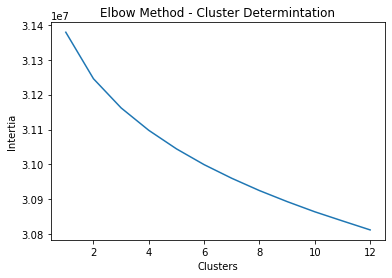

In [162]:
#plot elbow chart with standardized data 
plt.plot(range(1,13),inertia)
plt.title("Elbow Method - Cluster Determintation")
plt.xlabel('Clusters')
plt.ylabel('Intertia')

#the optimal number of clusters is the point after the steepest slope which is 4

In [33]:
kmeans = KMeans()

In [46]:
#perform kmeans clustering on non standardized data


inertia = []
for i in range(1,13):
    kmeans.set_params(n_clusters=i)
    kmeans.fit(df_nonstd)
    inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Intertia')

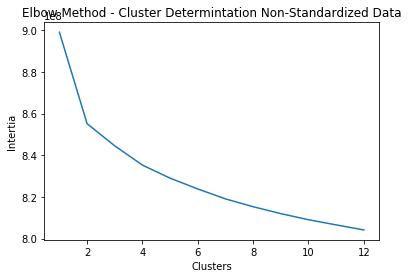

In [47]:
#plot elbow chart with non standardized data 
plt.plot(range(1,13),inertia)
plt.title("Elbow Method - Cluster Determintation Non-Standardized Data")
plt.xlabel('Clusters')
plt.ylabel('Intertia')


In [163]:
#Run kmeans with clusters = 3
kmeans.set_params(n_clusters=3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

clusters = kmeans.set_params(n_clusters=4).cluster_centers_
clusters.shape

In [165]:
predict = kmeans.fit_predict(pcaDF)
predict.shape

(175104,)

In [166]:
filtered_label0 = pcaDF[predict ==0]
filtered_label1 = pcaDF[predict==1]
filtered_label2 = pcaDF[predict==2]

In [178]:
filtered_label0.shape, filtered_label1.shape, filtered_label2.shape

((54630, 179), (60896, 179), (59578, 179))

In [186]:
centers = kmeans.cluster_centers_
centers.shape

(3, 179)

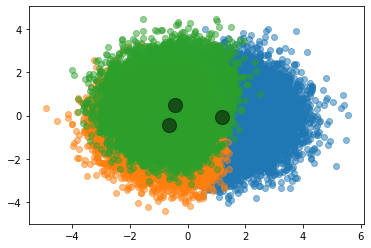

In [192]:
#Plot clusters 
plt.scatter(filtered_label0.iloc[:,0], filtered_label0.iloc[:,1])
plt.scatter(filtered_label1.iloc[:,0],filtered_label1.iloc[:,1])
plt.scatter(filtered_label2.iloc[:,0], filtered_label2.iloc[:,1])
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()


In [193]:
#Overlapping in Kmeans plot suggest similarietes between features
#Two clusters more alike than the third

In [194]:
%%HTML
<h3> Perform Agglomerative Clustering <h3>

In [195]:
agglo = AgglomerativeClustering()

In [196]:
#perform agglomerative clustering with k = 3 clusters and average linkage
agglo.set_params(n_clusters=3, linkage="average") 


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [197]:
agglo.fit(pcaDF)

MemoryError: Unable to allocate array with shape (15330617856,) and data type float64

In [28]:
%%HTML
<h3> Train Test Split </h3>

In [20]:
#Train Test split

train, test = train_test_split(pcaDF, test_size=0.3, random_state=42)


In [21]:
train.shape, test.shape

((122572, 200), (52532, 200))